<a href="https://colab.research.google.com/github/AshwinPrksh00/Lazyprogrammer-ComputerVision-Codes/blob/main/3.%20Convolutional%20Neural%20Networks/TF2_0_CIFAR_10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Dropout, Dense, Flatten, Input
from tensorflow.keras.models import Model

In [2]:
#Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

170508288/170498071 [==============================] - 3s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000,)


In [3]:
class_num = len(set(y_train))
print('No of classes in dataset:', class_num)

No of classes in dataset: 10


In [4]:
#Building the model using Keras API
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation='relu') (i)
x = Conv2D(64, (3,3), strides = 2, activation = 'relu')(x)
x = Conv2D(128, (3,3), strides = 2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(class_num, activation='softmax')(x)

model = Model(i,x)

In [5]:
#Compile and Train the model
model.compile(optimizer = 'adam',
          loss = 'sparse_categorical_crossentropy',
          metrics = ['accuracy'])

model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 27s 10ms/step - loss: 1.5126 - accuracy: 0.4493 - val_loss: 1.2418 - val_accuracy: 0.5584
Epoch 2/15
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1949 - accuracy: 0.5739 - val_loss: 1.1217 - val_accuracy: 0.5906
Epoch 3/15
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0306 - accuracy: 0.6363 - val_loss: 1.0123 - val_accuracy: 0.6435
Epoch 4/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8988 - accuracy: 0.6794 - val_loss: 0.9185 - val_accuracy: 0.6740
Epoch 5/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7912 - accuracy: 0.7209 - val_loss: 0.9098 - val_accuracy: 0.6765
Epoch 6/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6923 - accuracy: 0.7539 - val_loss: 0.8648 - val_accuracy: 0.6994
Epoch 7/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6125 - accuracy: 0.7818 - val_loss: 0.8776 - val_a

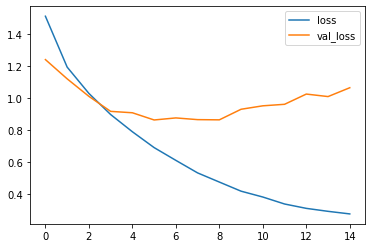

In [10]:
#Plot the loss per iteration
plt.plot(model.history.history['loss'], label = 'loss')
plt.plot(model.history.history['val_loss'], label = 'val_loss')
plt.legend()

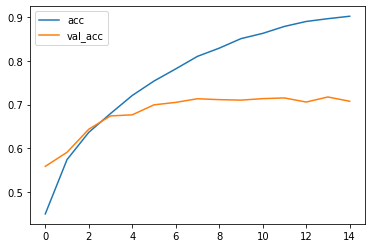

In [11]:
#Plot the accuracy per iteration
plt.plot(model.history.history['accuracy'], label = 'acc')
plt.plot(model.history.history['val_accuracy'], label = 'val_acc')
plt.legend()

Confusion Matrix Non-Normalized
[[719  24  57  33  33   6  12  19  62  35]
 [ 21 823  10   7   4   7  10   6  33  79]
 [ 43   8 587  79 120  47  78  24   7   7]
 [  5  10  63 520  85 182  67  39  13  16]
 [ 17   4  47  68 730  31  32  65   5   1]
 [  8   4  51 203  68 576  34  48   3   5]
 [  4   2  40  75  58  36 768   6   7   4]
 [  9   1  32  47  62  52   8 781   3   5]
 [ 53  31  21  28  15   7  11   6 808  20]
 [ 25  77  17  27   5  18   6  31  30 764]]


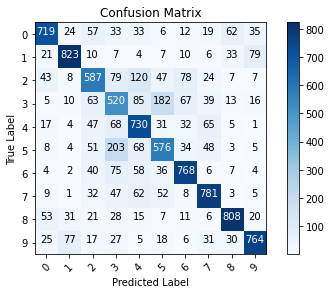

In [12]:
#Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import itertools 
def plot_CM(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    print('Normalized Confusion Matrix')
  else:
    print('Confusion Matrix Non-Normalized')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j], fmt), horizontalalignment = 'center', color='white' if cm[i,j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_CM(cm, list(range(10)))

In [13]:
# Label mapping
labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split(" ")

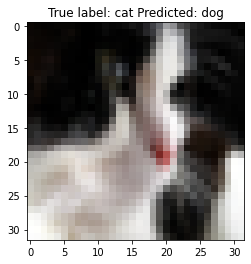

In [24]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));